In [1]:
%matplotlib inline

import os
import re
from gzip import GzipFile
import json

from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/shajek/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
DATDIR = "."
DATFILES = [
    "teslatweet_2017-1-5.gz",
    "teslatweet_2017-1-6.gz",
]
DATFILE = "teslatweet_2017-1-5.gz"
DATPATH = os.path.join(DATDIR, DATFILE)

In [3]:
rawlines = []
for F in DATFILES:
    with GzipFile(os.path.join(DATDIR, F)) as f:
        rawlines.extend(f.readlines())

In [4]:
len(rawlines), sum(map(len, rawlines))

(9172, 53131676)

In [5]:
records = map(json.loads, rawlines)

In [6]:
df = pd.DataFrame.from_records(records, index='id')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9172 entries, 817102013230153728 to 817516995734343681
Data columns (total 32 columns):
contributors                 0 non-null object
coordinates                  6 non-null object
created_at                   9172 non-null object
display_text_range           1360 non-null object
entities                     9172 non-null object
extended_entities            3638 non-null object
extended_tweet               233 non-null object
favorite_count               9172 non-null int64
favorited                    9172 non-null bool
filter_level                 9172 non-null object
geo                          6 non-null object
id_str                       9172 non-null object
in_reply_to_screen_name      448 non-null object
in_reply_to_status_id        328 non-null float64
in_reply_to_status_id_str    328 non-null object
in_reply_to_user_id          448 non-null float64
in_reply_to_user_id_str      448 non-null object
is_quote_status             

In [9]:
df['user'].iloc[0]

{u'contributors_enabled': False,
 u'created_at': u'Wed May 23 15:11:47 +0000 2012',
 u'default_profile': False,
 u'default_profile_image': False,
 u'description': u'La place de march\xe9 de la voiture #hybride et #\xe9lectrique',
 u'favourites_count': 6213,
 u'follow_request_sent': None,
 u'followers_count': 1958,
 u'following': None,
 u'friends_count': 482,
 u'geo_enabled': False,
 u'id': 588438255,
 u'id_str': u'588438255',
 u'is_translator': False,
 u'lang': u'fr',
 u'listed_count': 138,
 u'location': u'Paris, France',
 u'name': u'Breezcar',
 u'notifications': None,
 u'profile_background_color': u'C0DEED',
 u'profile_background_image_url': u'http://pbs.twimg.com/profile_background_images/860756868/c68cfacd4bccdb757df79f140eea9067.jpeg',
 u'profile_background_image_url_https': u'https://pbs.twimg.com/profile_background_images/860756868/c68cfacd4bccdb757df79f140eea9067.jpeg',
 u'profile_background_tile': False,
 u'profile_banner_url': u'https://pbs.twimg.com/profile_banners/588438255/

In [8]:
user_df = pd.DataFrame.from_items(df['user'].iteritems()).T

In [9]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9172 entries, 817102013230153728 to 817516995734343681
Data columns (total 38 columns):
contributors_enabled                  9172 non-null object
created_at                            9172 non-null object
default_profile                       9172 non-null object
default_profile_image                 9172 non-null object
description                           8129 non-null object
favourites_count                      9172 non-null object
follow_request_sent                   0 non-null object
followers_count                       9172 non-null object
following                             0 non-null object
friends_count                         9172 non-null object
geo_enabled                           9172 non-null object
id                                    9172 non-null object
id_str                                9172 non-null object
is_translator                         9172 non-null object
lang                                  9172

In [10]:
user_df.columns = ['user_' + c for c in user_df.columns]

In [11]:
df2 = pd.concat([df, user_df], axis=1)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9172 entries, 817102013230153728 to 817516995734343681
Data columns (total 70 columns):
contributors                               0 non-null object
coordinates                                6 non-null object
created_at                                 9172 non-null object
display_text_range                         1360 non-null object
entities                                   9172 non-null object
extended_entities                          3638 non-null object
extended_tweet                             233 non-null object
favorite_count                             9172 non-null int64
favorited                                  9172 non-null bool
filter_level                               9172 non-null object
geo                                        6 non-null object
id_str                                     9172 non-null object
in_reply_to_screen_name                    448 non-null object
in_reply_to_status_id                      3

In [13]:
df2['user_verified'].value_counts()

False    9075
True       97
Name: user_verified, dtype: int64

In [14]:
len(df2['user_id'].unique())

8062

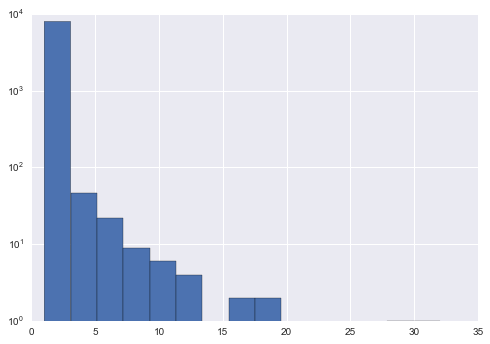

In [15]:
df2['user_id'].value_counts().hist(bins=15, log=True)

In [16]:
df2['user_id'].value_counts().head()

19730963              32
23392365              29
751736611260338176    19
712213086879490048    18
2394132894            16
Name: user_id, dtype: int64

In [17]:
df2['entities'].iloc[0]

{u'hashtags': [],
 u'symbols': [],
 u'urls': [{u'display_url': u'dlvr.it/N2h0Bv',
   u'expanded_url': u'http://dlvr.it/N2h0Bv',
   u'indices': [93, 116],
   u'url': u'https://t.co/a7sbkgAp8D'}],
 u'user_mentions': [{u'id': 11660792,
   u'id_str': u'11660792',
   u'indices': [3, 17],
   u'name': u'Mehdi Tebourbi',
   u'screen_name': u'TremendousNet'}]}

In [19]:
df2['favorite_count'].value_counts()

0    9172
Name: favorite_count, dtype: int64

In [20]:
df2['retweeted'].value_counts()

False    9172
Name: retweeted, dtype: int64

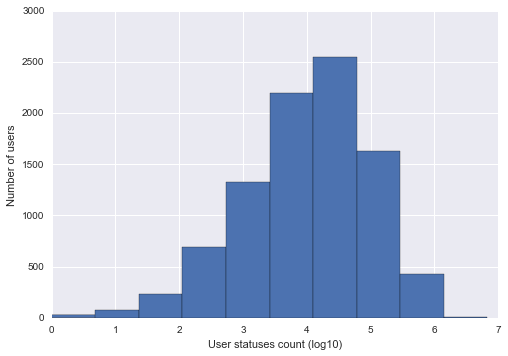

In [21]:
df2['user_statuses_count'].map(np.log10).hist()
plt.xlabel('User statuses count (log10)')
plt.ylabel('Number of users')

In [22]:
df2['user_statuses_count'].iloc[0]

6458

In [23]:
# re-tweets
df2['text'].str.startswith('RT').value_counts()

True     5300
False    3872
Name: text, dtype: int64

In [24]:
df2.ix[df2['text'].str.startswith('RT'), 'text'].head()

id
817102013230153728    RT @TremendousNet: Tesla : l'usine de batterie...
817102020779839489    RT @UlricDabe: Belgium sales #febiac : More #T...
817102031420870656    RT @GN_Nordhorn: #Papenburg und #Dörpen bewerb...
817102036516814849    RT @ReformedBroker: If you drive off in a stol...
817102041835339777    RT @TeslaMotors: Battery Cell Production Begin...
Name: text, dtype: object

In [25]:
df2.shape

(9172, 70)

In [26]:
len(df2['text'].unique())

4695

In [27]:
RT = re.compile(r'^RT ')
RT_func = lambda x: RT.sub('', x)

In [28]:
text_no_RT = df2['text'].map(RT_func)

In [29]:
text_no_RT.head()

id
817102013230153728    @TremendousNet: Tesla : l'usine de batteries G...
817102014463279105    Tesla Model S fleet helps Uber show its green ...
817102020779839489    @UlricDabe: Belgium sales #febiac : More #Tesl...
817102022638006272    @AlfonsWispels Ja, dat. Of ik ken het hele AC ...
817102031420870656    @GN_Nordhorn: #Papenburg und #Dörpen bewerben ...
Name: text, dtype: object

In [30]:
text_no_RT.str.startswith('RT ').value_counts()

False    9172
Name: text, dtype: int64

In [31]:
len(text_no_RT.unique())

4695

Same number of unique, so there are no messages that appear as both the original and as re-tweets

# Make random sample/ordering for labeling

In [32]:
df2.shape

(9172, 70)

In [33]:
df2['rand'] = np.random.rand(df2.shape[0])

In [34]:
df2_rand = df2.sort_values(by='rand', inplace=False)

In [35]:
df2_rand_nodups = df2_rand.ix[~ df2_rand.text.duplicated()]

In [37]:
df2_rand_nodups.loc[:, 'labels'] = ''

In [38]:
df2_rand_nodups.shape

(4695, 72)

## Write tweets sample to CSV

For subsequent manual labeling.

In [39]:
cols_basic = [
    'id_str',
    'created_at',
    'user_name',
    'user_screen_name',
    'user_protected',
    'user_verified',
    'lang',
    'labels',
    'text',
]

In [ ]:
_csv_fname = 'tesla_tweets_rand_for_label_2017-1-6.csv'
df2_rand_nodups.ix[:, cols_basic].to_csv(
    _csv_fname, 
    index=False,
    encoding='utf-8'
)